In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

Load the Financial Transactions Dataset 

In [26]:
df = pd.read_csv('./anomaly_financial_transactions.csv')

View the first 5 rows

In [ ]:
df.head(3)

,transaction_id,timestamp,account_id,merchant,location,amount,currency,device_type,transaction_type,is_anomaly
0,9a5d8c2f-b1c3-42b4-b49c-334d832b4f00,2025-05-19T19:55:40,53531490,Harris-Perry,New Emma,423.53,ZAR,POS,Purchase,0
1,0179c562-d2d8-46b6-b633-ea16953e513c,2025-05-18T23:34:22,58081968,"Ramirez, Wright and Cross",South Hollymouth,40.53,ZAR,POS,Withdrawal,0
2,7246e35c-5d77-4c3a-96a6-b2952ed15da2,2025-06-07T16:52:24,52093471,Smith-Garrison,Port Thomas,22.30,ZAR,Mobile,Transfer,0
3,69fa95db-8162-475a-812c-81b1245c8917,2025-04-12T22:55:39,76705991,Johnson Group,East Amyfurt,13.31,ZAR,Web,Withdrawal,0
4,2473cd22-7e57-4d62-ae94-0638ba4bd089,2025-01-12T17:05:38,84715633,"Boone, White and Mclaughlin",Leefort,53.47,ZAR,POS,Withdrawal,0


Get the shape of the dataset

In [28]:
df.shape

(10000, 10)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_id    10000 non-null  object 
 1   timestamp         10000 non-null  object 
 2   account_id        10000 non-null  int64  
 3   merchant          10000 non-null  object 
 4   location          10000 non-null  object 
 5   amount            10000 non-null  float64
 6   currency          10000 non-null  object 
 7   device_type       10000 non-null  object 
 8   transaction_type  10000 non-null  object 
 9   is_anomaly        10000 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 781.4+ KB


In [30]:
df['amount'].describe()

count    10000.000000
mean       968.373500
std       5334.362524
min          0.000000
25%         29.147500
50%         70.465000
75%        144.897500
max      49980.210000
Name: amount, dtype: float64

In [31]:
df.isnull().sum()

transaction_id      0
timestamp           0
account_id          0
merchant            0
location            0
amount              0
currency            0
device_type         0
transaction_type    0
is_anomaly          0
dtype: int64

In [32]:
df['transaction_id'].duplicated().sum()

np.int64(0)

<Axes: title={'center': 'Anonaly Class Distributrion'}, xlabel='is_anomaly'>

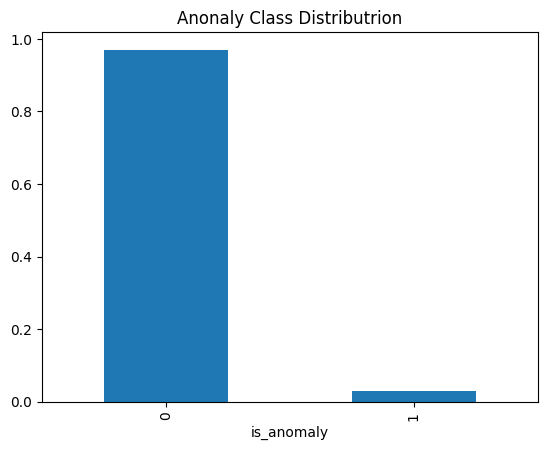

In [33]:
df['is_anomaly'].value_counts(normalize=True).plot(kind='bar', title= 'Anonaly Class Distributrion')

Text(0.5, 0, 'Amount (ZAR)')

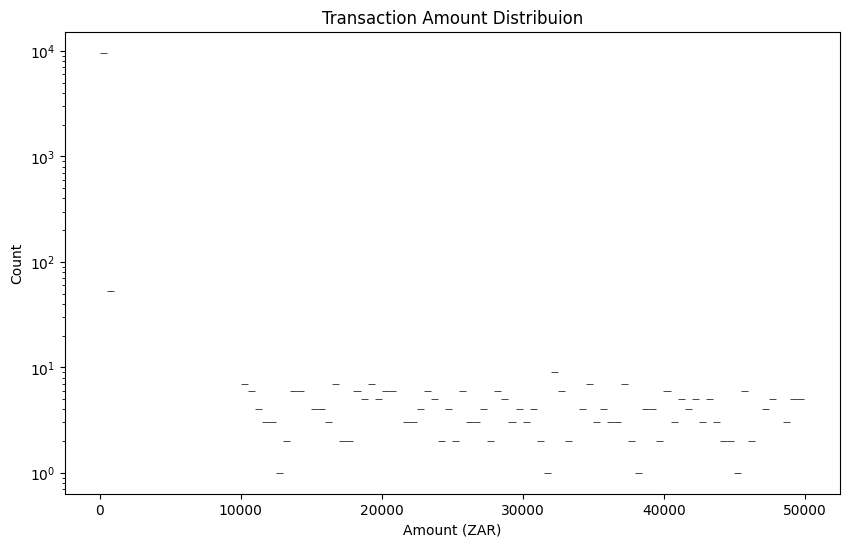

In [34]:
plt.figure(figsize=(10,6))
sns.histplot(df['amount'], bins=100, log_scale=(False, True))
plt.title("Transaction Amount Distribuion")
plt.xlabel('Amount (ZAR)')

<Axes: xlabel='is_anomaly', ylabel='amount'>

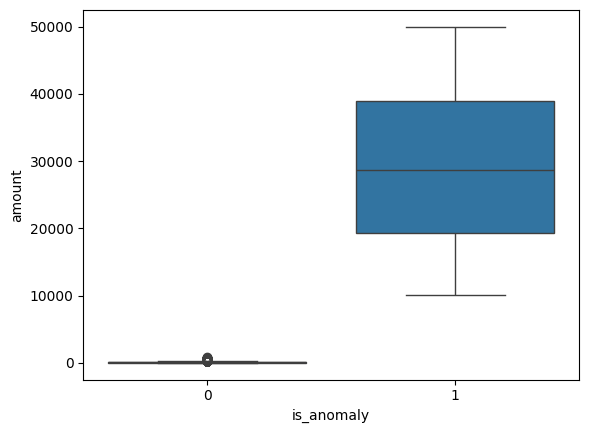

In [35]:
sns.boxplot(x='is_anomaly', y = 'amount', data=df)

In [36]:
for col in ['transaction_type', 'device_type', 'location']:
    print(f"\n{col}:\n", df[col].value_counts())


transaction_type:
 transaction_type
Withdrawal    3369
Transfer      3352
Purchase      3279
Name: count, dtype: int64

device_type:
 device_type
POS          3257
Web          3234
Mobile       3209
Simulated     156
Unknown       144
Name: count, dtype: int64

location:
 location
South Michael        14
Port Michael         11
West Michael         11
Port James           10
North Michael         9
                     ..
Peggystad             1
East Shanechester     1
New Christineton      1
Port Tylerhaven       1
Leonardfurt           1
Name: count, Length: 7716, dtype: int64


<Axes: xlabel='device_type', ylabel='count'>

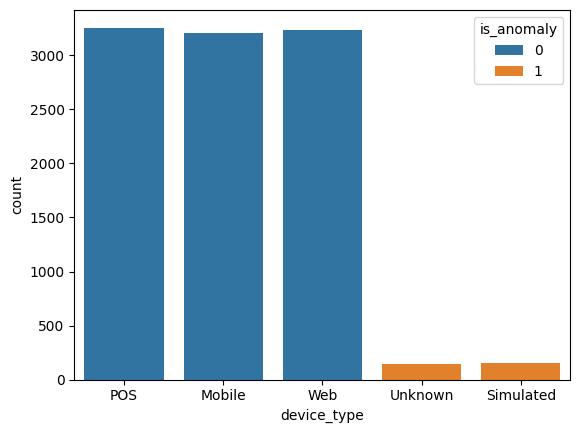

In [37]:
sns.countplot(x = 'device_type', hue ="is_anomaly", data = df)

<Axes: xlabel='hour', ylabel='count'>

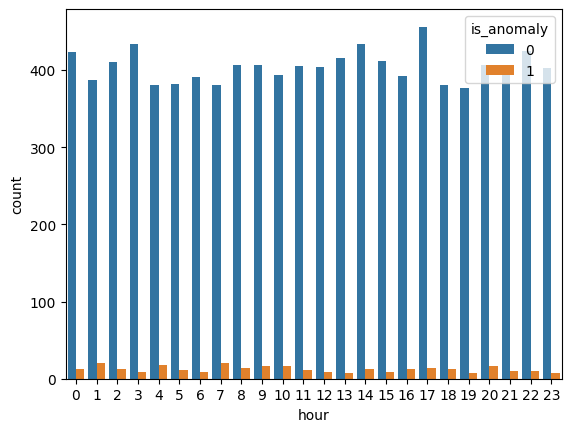

In [38]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['hour'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.day_name()

sns.countplot(x='hour', hue='is_anomaly', data =df)

<Axes: xlabel='day_of_week', ylabel='count'>

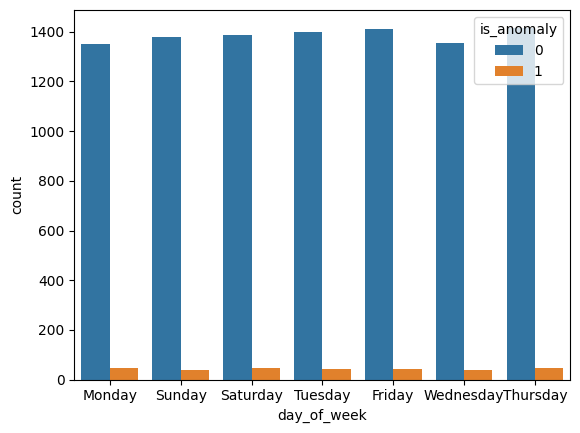

In [39]:
sns.countplot(x='day_of_week', hue='is_anomaly', data =df)

<Axes: >

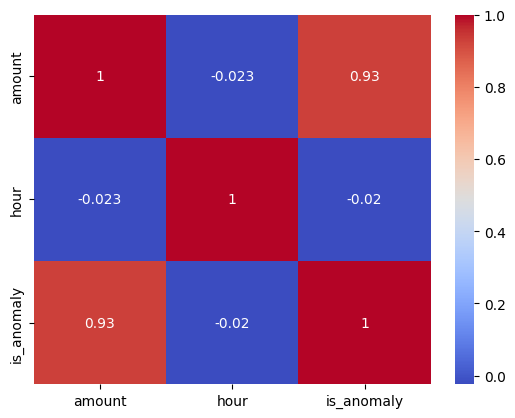

In [40]:
corr = df[['amount', 'hour', 'is_anomaly']].corr()
sns.heatmap(corr, annot =True, cmap='coolwarm')

In [41]:
print(df.columns)

Index(['transaction_id', 'timestamp', 'account_id', 'merchant', 'location',
       'amount', 'currency', 'device_type', 'transaction_type', 'is_anomaly',
       'hour', 'day_of_week'],
      dtype='object')


In [42]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

cols_to_drop = ['transaction_id', 'timestamp', 'merchant', 'location', 'currency']
existing_cols = [col for col in cols_to_drop if col in df.columns]
df = df.drop(columns=existing_cols)

#Preproceccing

df['device_type'] = LabelEncoder().fit_transform(df['device_type'])
df['transaction_type'] = LabelEncoder().fit_transform(df['transaction_type'])
df['day_of_week'] = LabelEncoder().fit_transform(df['day_of_week'])                                          

#Define features and lables

X = df.drop(columns=['is_anomaly'])
y = df['is_anomaly']

#Scale Features
X_scaled = StandardScaler().fit_transform(X)

#Split into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 6), (2000, 6), (8000,), (2000,))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1940
           1       0.59      1.00      0.74        60

    accuracy                           0.98      2000
   macro avg       0.79      0.99      0.86      2000
weighted avg       0.99      0.98      0.98      2000

[[1898   42]
 [   0   60]]
ROC AUC SCORE:  0.9891752577319587


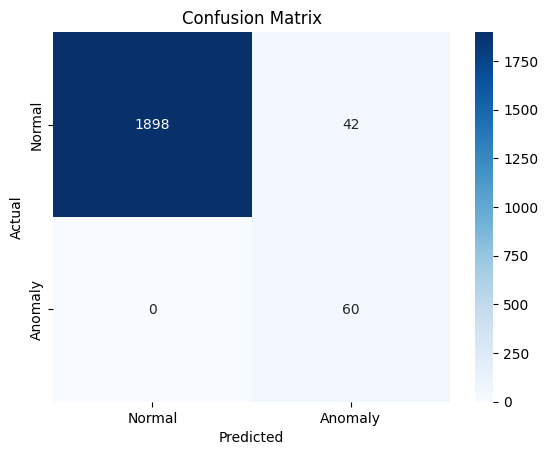

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Train Isolation Forest model
isolation_model = IsolationForest(contamination=0.05, random_state=42)
isolation_model.fit(X_train)


# Predict anomalies
y_pred_isolation = isolation_model.predict(X_test)

# Convert predictions to binary (1 for anomaly, 0 for normal)
y_pred_isolation = np.where(y_pred_isolation == -1, 1, 0)

# Evaluate the model
print(classification_report(y_test, y_pred_isolation))
print(confusion_matrix(y_test, y_pred_isolation))
print('ROC AUC SCORE: ', roc_auc_score(y_test, y_pred_isolation))

# Visualize the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_isolation), annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Normal', 'Anomaly'], yticklabels=['Normal', 'Anomaly'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

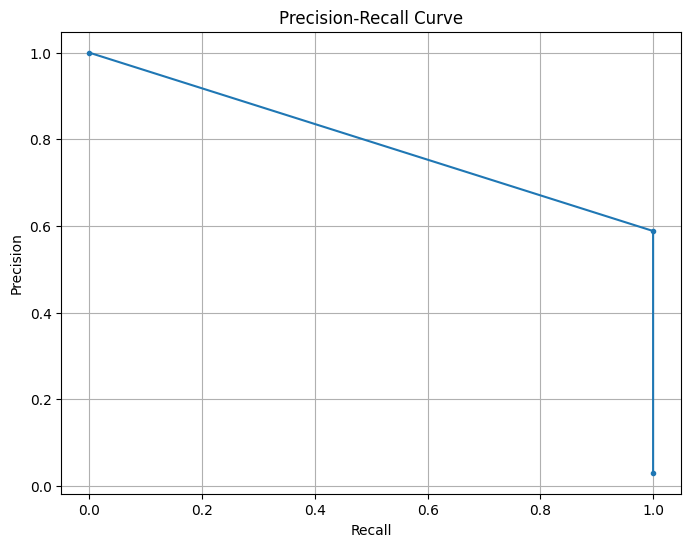

In [44]:
from sklearn.metrics import precision_recall_curve

# Calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_isolation)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve')     
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid()
plt.show()


Logistic Regression Model Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1940
           1       1.00      1.00      1.00        60

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

[[1940    0]
 [   0   60]]
ROC AUC SCORE:  1.0


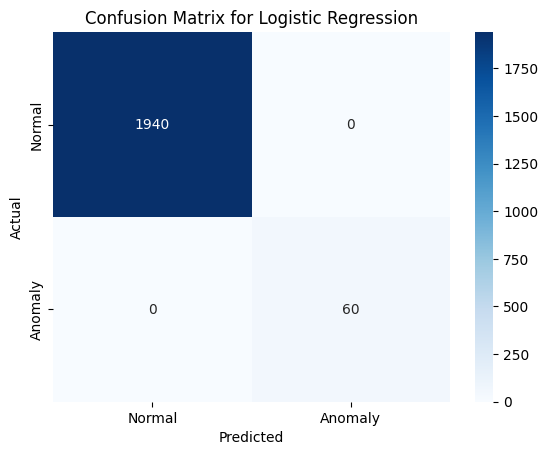

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# Train a Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)

# Predict using the Logistic Regression model
y_pred_logistic = logistic_model.predict(X_test)

# Evaluate the Logistic Regression model
print("Logistic Regression Model Accuracy:", accuracy_score(y_test, y_pred_logistic))
print(classification_report(y_test, y_pred_logistic))
print(confusion_matrix(y_test, y_pred_logistic))
print('ROC AUC SCORE: ', roc_auc_score(y_test, y_pred_logistic))

# Visualize the confusion matrix for Logistic Regression
sns.heatmap(confusion_matrix(y_test, y_pred_logistic), annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Normal', 'Anomaly'], yticklabels=['Normal', 'Anomaly'])
plt.title('Confusion Matrix for Logistic Regression')   
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Isolation Forest Model Accuracy: 0.979
Logistic Regression Model Accuracy: 1.0


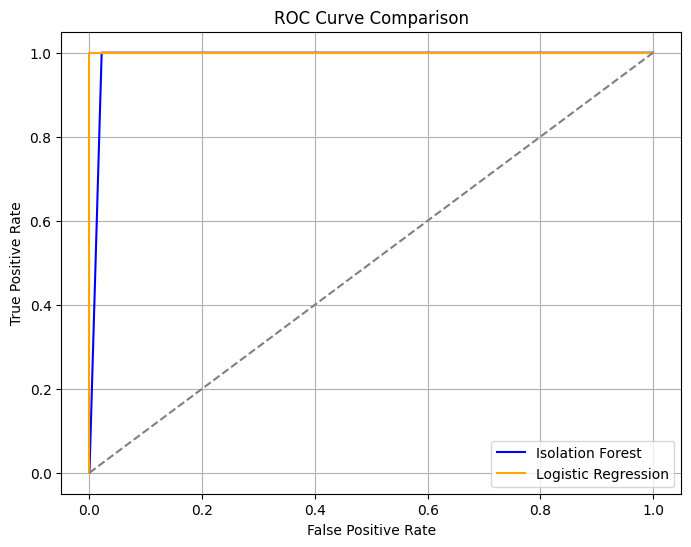

In [ ]:
# Compare the performance of both models
print("Isolation Forest Model Accuracy:", accuracy_score(y_test, y_pred_isolation))
print("Logistic Regression Model Accuracy:", accuracy_score(y_test, y_pred_logistic))

# Compare ROC AUC scores
print("Isolation Forest ROC AUC Score:", roc_auc_score(y_test, y_pred_isolation))
print("Logistic Regression ROC AUC Score:", roc_auc_score(y_test, logistic_model.predict_proba(X_test)[:, 1]))

# Visualize the ROC curve for both models
from sklearn.metrics import roc_curve
fpr_isolation, tpr_isolation, _ = roc_curve(y_test, y_pred_isolation)
fpr_logistic, tpr_logistic, _ = roc_curve(y_test, logistic_model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr_isolation, tpr_isolation, label='Isolation Forest', color='blue')
plt.plot(fpr_logistic, tpr_logistic, label='Logistic Regression', color='orange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()  
plt.show()